In [1]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from collections import Counter
%matplotlib inline

In [9]:
df = pd.read_csv('data/final.csv')

In [10]:
df.head()

,Unnamed: 0,id,text,label,clean_tweet,Hash Words
0,0,0,Drasko they didn't cook half a bird you idiot ...,1,drasko cook half bird idiot,No hashtags
1,1,1,Hopefully someone cooks Drasko in the next ep ...,1,hope someon cook drasko next ep,No hashtags
2,2,2,of course you were born in serbia...you're as ...,1,cours born serbiay fuck serbian film,No hashtags
3,3,3,These girls are the equivalent of the irritati...,1,girl equival irrit asian girl coupl year ago w...,No hashtags
4,4,4,RT @YesYoureRacist: At least you're only a tin...,1,least tini bit racist racist dick,No hashtags


In [11]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [12]:
df.count()

id             30197
text           30197
label          30197
clean_tweet    30187
Hash Words     30197
dtype: int64

In [13]:
df.loc[df.isnull().any(axis=1)]

,id,text,label,clean_tweet,Hash Words
678,678,@BLUNTmoms How?,1,NaN,No hashtags
837,837,@thesledgetobias ?,1,NaN,No hashtags
851,851,@ILivUndrUrBed @CarolynnEva No.,1,NaN,No hashtags
894,894,@purposelyflawed http://t.co/P6KTLT0XBZ,1,NaN,No hashtags
1030,1030,"@AmarinaW You, too.",1,NaN,No hashtags
1037,1037,@Menrwizards @Maniac_McGee27 @sara771987 Where...,1,NaN,No hashtags
1206,1206,@g56yu What is that?,1,NaN,No hashtags
1219,1219,RT @Dekashoko: @theesadiemarie @MT8_9 http://t...,1,NaN,No hashtags
1283,1283,RT @rapebombing: @TamedInsanity @MT8_9 http://...,1,NaN,No hashtags
1284,1284,@beerandfeminism @Wyowanderer777 Which is?,1,NaN,No hashtags


In [14]:
df = df.drop([678,837,851,894,1030,1037,1206,1219,1283,1284])

In [16]:
df = df.reset_index()

In [15]:
df.loc[df.isnull().any(axis=1)]

,id,text,label,clean_tweet,Hash Words


In [17]:
df["id"] = df.index

In [18]:
df = df.drop('index', axis=1)

In [19]:
df

,id,text,label,clean_tweet,Hash Words
0,0,Drasko they didn't cook half a bird you idiot ...,1,drasko cook half bird idiot,No hashtags
1,1,Hopefully someone cooks Drasko in the next ep ...,1,hope someon cook drasko next ep,No hashtags
2,2,of course you were born in serbia...you're as ...,1,cours born serbiay fuck serbian film,No hashtags
3,3,These girls are the equivalent of the irritati...,1,girl equival irrit asian girl coupl year ago w...,No hashtags
4,4,RT @YesYoureRacist: At least you're only a tin...,1,least tini bit racist racist dick,No hashtags
...,...,...,...,...,...
30182,30182,Full of fools.. ICC @ICCMediaComms @ICC @crick...,1,full fool icc shameonicc,#shameonicc
30183,30183,"The US-Mexican border, where established moral...",1,usmexican border establish moral leadership na...,#trumpisatraitor
30184,30184,@ICC All Eng matches are on dry pitches &amp; ...,1,eng match dri pitch sunni day other gift green...,#shameonicc
30185,30185,It seems the Rain &amp; thunder god only like ...,1,seem rain thunder god like see play field disc...,#shameonicc


# Histogram

In [20]:
df['text length'] = df['clean_tweet'].apply(len)

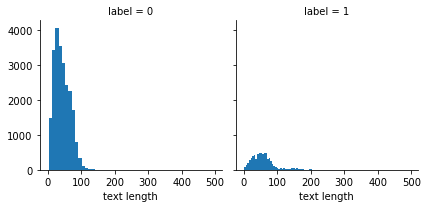

In [21]:
graph = sb.FacetGrid(data=df, col='label')
graph.map(plt.hist, 'text length', bins=50)

# Box-plot 

<AxesSubplot:xlabel='label', ylabel='text length'>

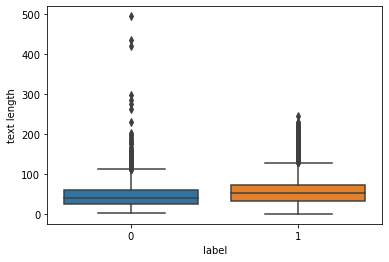

In [22]:
sb.boxplot(x='label', y='text length', data=df)

# Wordcloud 

Hate words


(-0.5, 799.5, 499.5, -0.5)

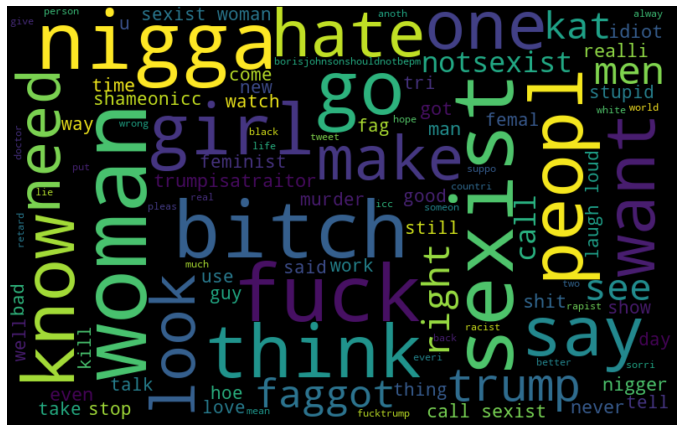

In [23]:
hate_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(hate_words)
print('Hate words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Non-Hate words


(-0.5, 799.5, 499.5, -0.5)

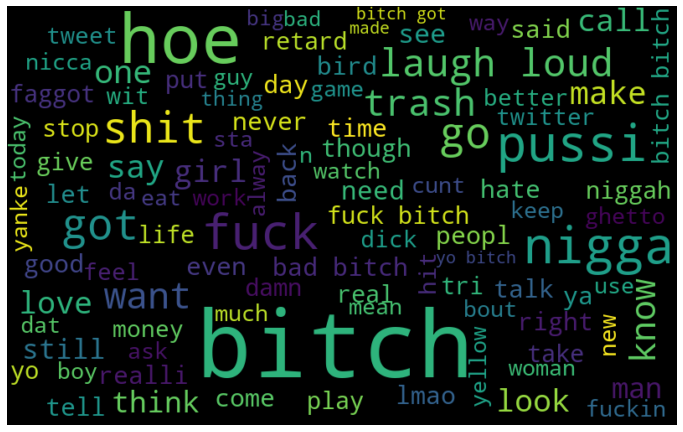

In [24]:
hate_words = ' '.join([word for word in df['clean_tweet'][df['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(hate_words)
print('Non-Hate words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')